   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

Average Retention Rates:
         retention_1  retention_7
version                          
gate_30     0.448188     0.190201
gate_40     0.442283     0.182000

T-test results:
1-day retention: t-stat=-inf, p-value=nan
7-day retention: t-stat=-inf, p-value=nan


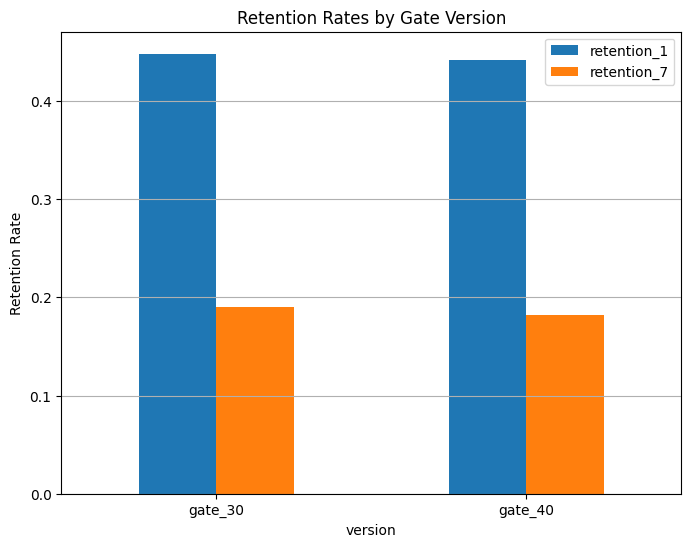

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv"
df = pd.read_csv(url)

# Check the structure of the dataset
print(df.head())

# Compute average retention rates for both groups
retention_rates = df.groupby('version')[['retention_1', 'retention_7']].mean()
print("\nAverage Retention Rates:")
print(retention_rates)

# Perform statistical tests to check significance
group_30 = df[df['version'] == 'gate_30']
group_40 = df[df['version'] == 'gate_40']

t_stat1, p_val1 = stats.ttest_ind(group_30['retention_1'], group_40['retention_1'])
t_stat7, p_val7 = stats.ttest_ind(group_30['retention_7'], group_40['retention_7'])

print("\nT-test results:")
print(f"1-day retention: t-stat={t_stat1:.3f}, p-value={p_val1:.3f}")
print(f"7-day retention: t-stat={t_stat7:.3f}, p-value={p_val7:.3f}")

# Visualization
retention_rates.plot(kind='bar', figsize=(8, 6), ylabel="Retention Rate", title="Retention Rates by Gate Version")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()